In [86]:
import os
import glob
import pickle 

import numpy as np

%matplotlib inline 

import matplotlib.pyplot as plt

from scipy.stats import kde


In [59]:
for bench in ['bench1', 'bench2', 'bench3', 'bench4', 'bench5']:

    fin = open('../../../results/Data_11052020/'+ bench +'/shallow_fnn_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed_lr_0.1_batchSize_2048_epochs_1000_loss_mse.pkl', 'rb')
    model_data = pickle.load(fin)
    fin.close()

    fin = open('../../../datasets/Data_11052020_exponential_dist_ramps/benchmarks/'+ bench +'.pkl', 'rb')
    # fin = open('../../../datasets/Data_18042020/benchmark/0to50speed_0torque.pkl',  'rb')
    input_data = pickle.load(fin)
    fin.close()
    
    model_speed, model_torque = model_data
    
    ref_speed, ref_torque = input_data['reference_speed_interp'], input_data['reference_torque_interp']
    sim_speed, sim_torque = input_data['speed'], input_data['torque']
    time = input_data['time']

    plt.rcParams["figure.figsize"] = (20,10)
    plt.plot(time, ref_speed)
    plt.plot(time, sim_speed)
    plt.plot(time, model_speed)
    plt.savefig(bench + '_speed.png')
    plt.close()


    plt.rcParams["figure.figsize"] = (20,10)
    plt.plot(time, ref_torque)
    plt.plot(time, sim_torque)
    plt.plot(time, model_torque)
    plt.savefig(bench + '_torque.png')
    plt.close()

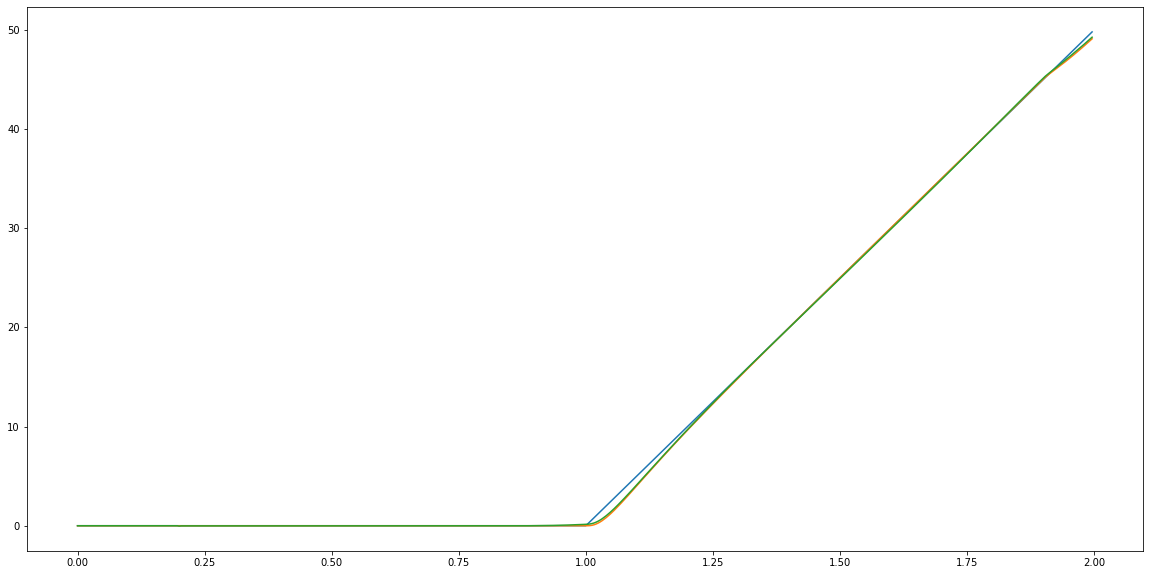

0.2535576116704803


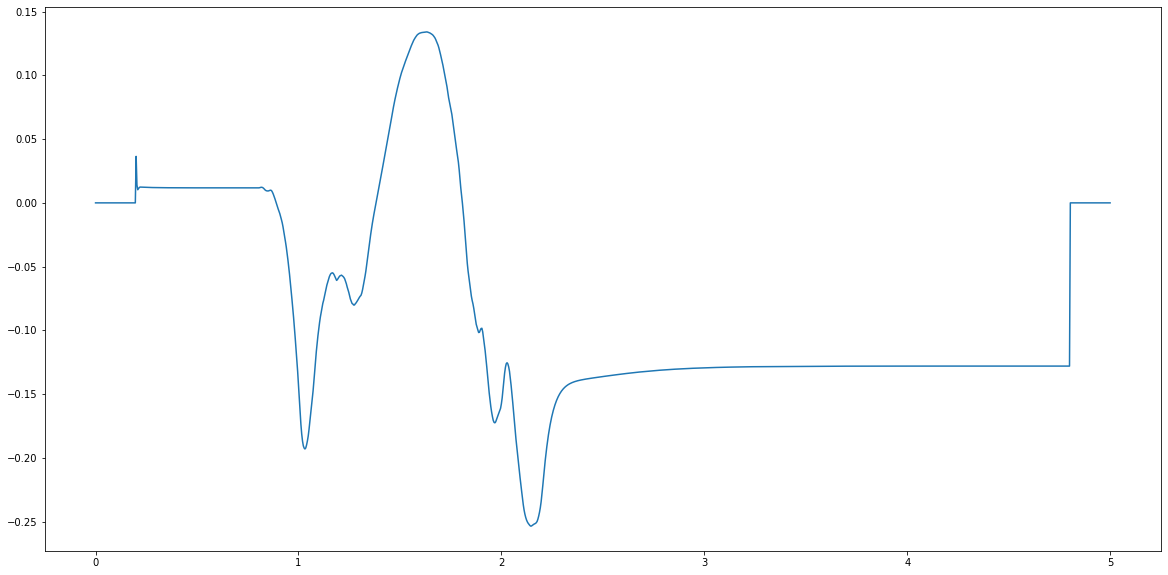

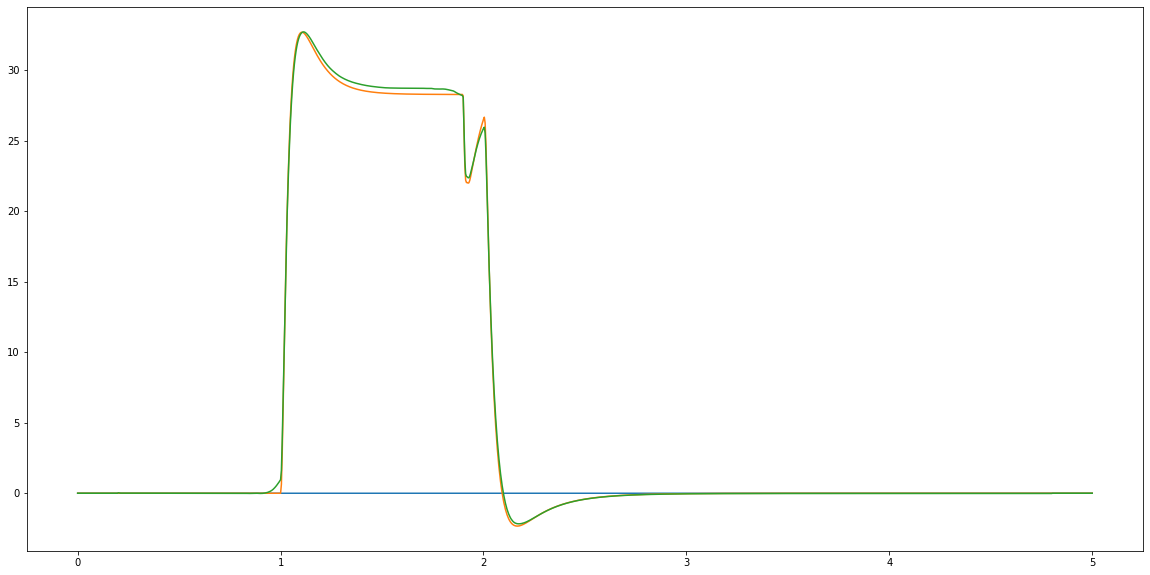

In [61]:
pkls = glob.glob('../../../datasets/Data_11052020_exponential_dist_ramps/train/*.pkl')

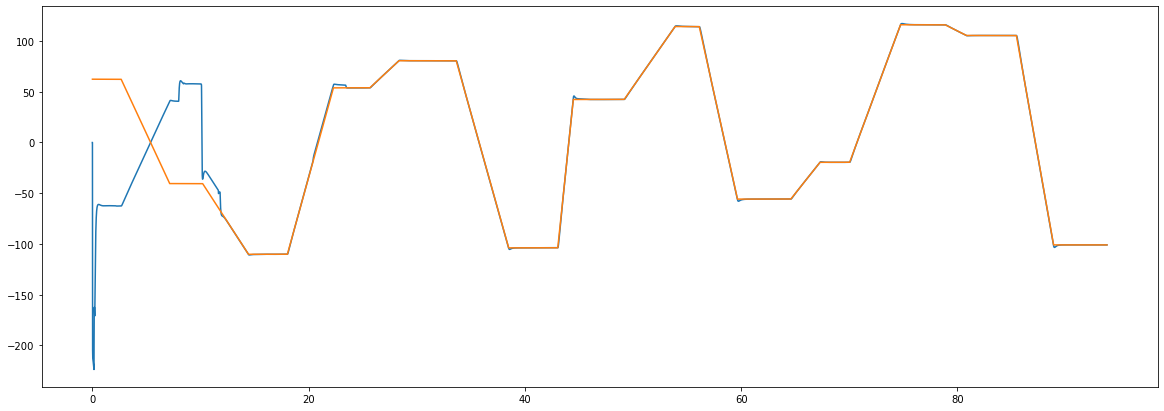

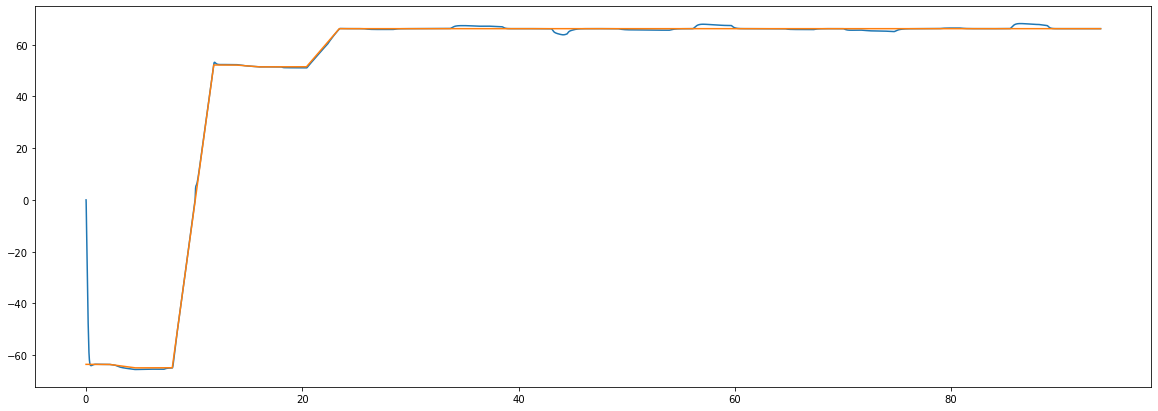

In [101]:

plt.rcParams["figure.figsize"] = (20,7)

for pkl in pkls:
    fin = open(pkl, 'rb')
    data = pickle.load(fin)
    fin.close()
    
    loc = np.argmax(data['torque'] < -200)
    plt.plot(data['time'], data['torque'], label='sim')
    plt.plot(data['time'], data['reference_torque_interp'], label='ref')
    plt.show()
    
    plt.plot(data['time'], data['speed'], label='sim')
    plt.plot(data['time'], data['reference_speed_interp'], label='ref')
    plt.show()
    break

In [83]:
pkls = glob.glob('../../../datasets/Data_11052020_exponential_dist_ramps/train/*.pkl')

torques = []
speeds = []
current_d = []
current_q = []
voltage_d = []
voltage_q = []

for pkl in pkls:
    fin = open(pkl, 'rb')
    data = pickle.load(fin)
    fin.close()
    
    torques += list(data['reference_torque_interp'])
    speeds += list(data['reference_speed_interp'])

In [ ]:
nbins = 300
speeds = np.asarray(speeds)
torques = np.asarray(torques)
k = kde.gaussian_kde([speeds, torques])
xi, yi = np.mgrid[speeds.min():speeds.max():nbins*1j, torques.min():torques.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# add shading
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)

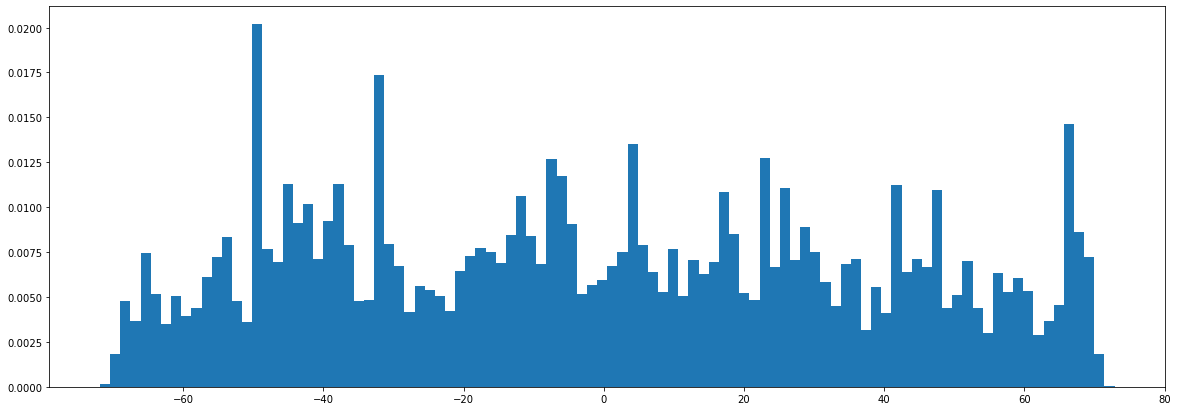

In [114]:
hist_speed = plt.hist(speeds, density=True, bins=100)

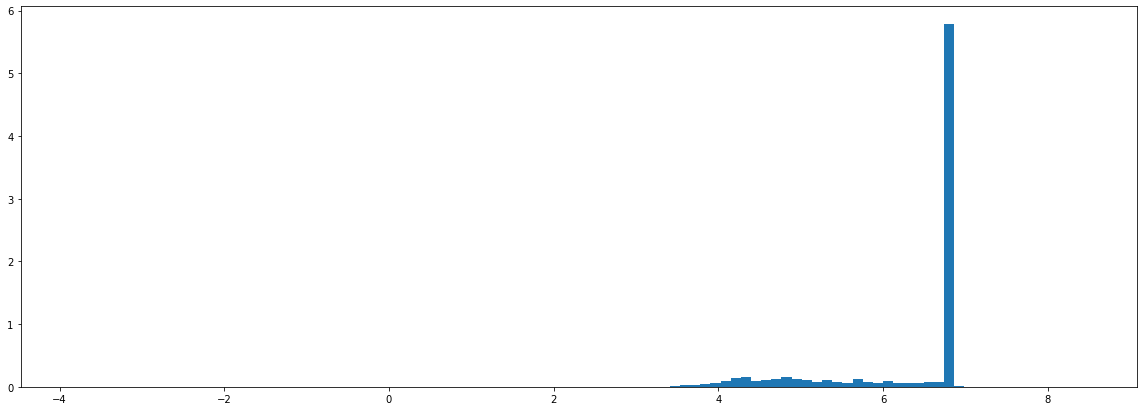

In [115]:
hist_current_d = plt.hist(current_d, density=True, bins=100)

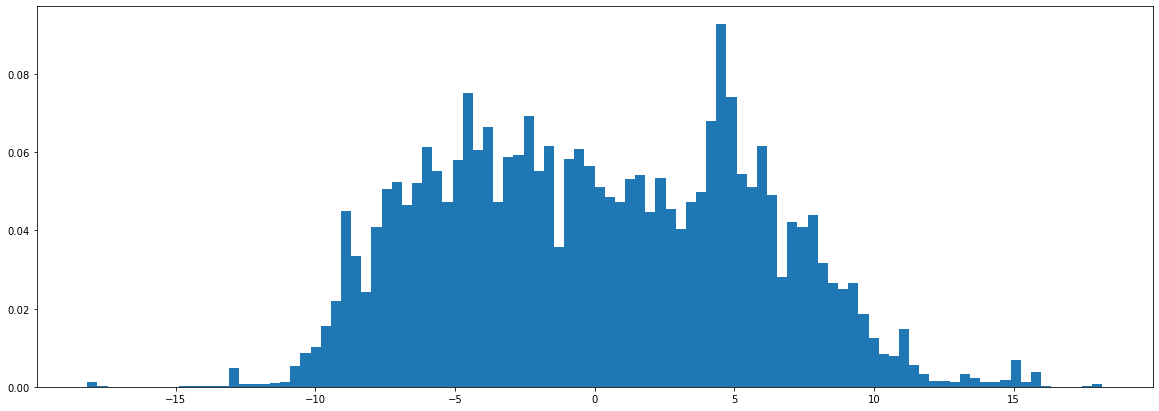

In [116]:
hist_current_q = plt.hist(current_q, density=True, bins=100)

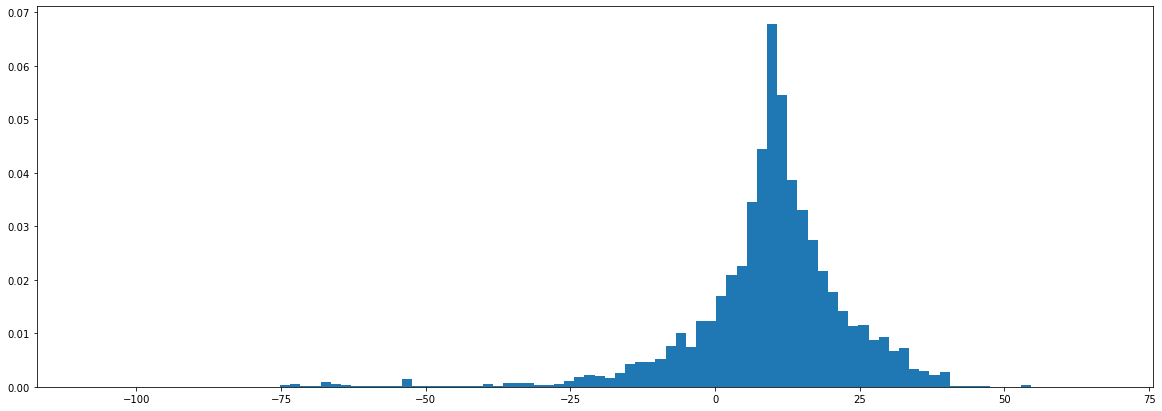

In [118]:
hist_voltage_d = plt.hist(voltage_d, density=True, bins=100)

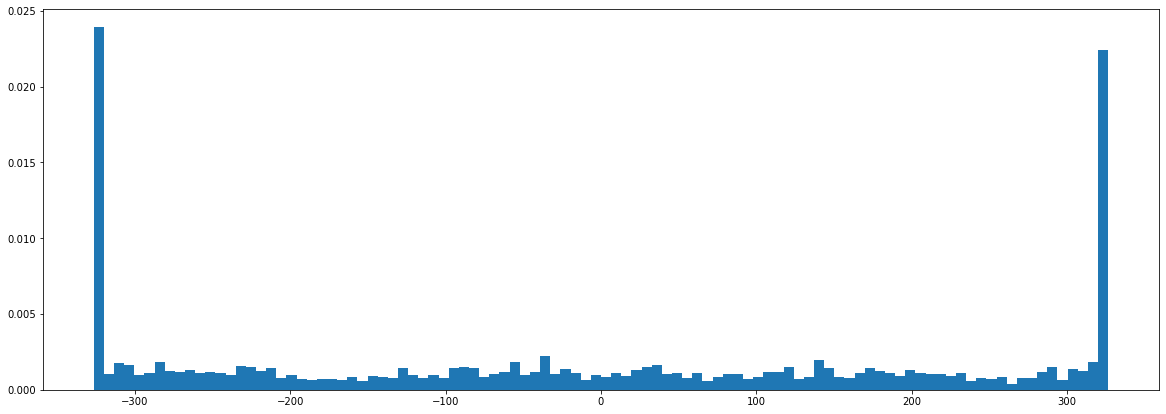

In [119]:
hist_voltage_q = plt.hist(voltage_q, density=True, bins=100)

In [46]:
fin = open('../../../results/Data_11052020/overshoot_vs_ramp_bad.pkl', 'rb')
ramp_overshoots = pickle.load(fin)
fin.close()

In [47]:
ramps_overshoots = np.asarray(ramp_overshoots)

In [48]:
ramps_overshoots.shape

(12, 3)

In [49]:
ramps = ramps_overshoots[:, 0]
sim_overshoots = ramps_overshoots[:, 1]
model_overshoots = ramps_overshoots[:, 2]

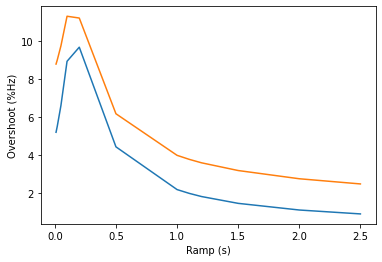

In [50]:
plt.plot(ramps, sim_overshoots)
plt.plot(ramps, model_overshoots)
plt.xlabel('Ramp (s)')
plt.ylabel('Overshoot (%Hz)')
plt.savefig('bad.png')